In [1]:
from simulate import iterate, set_mb, view_mb, est_area
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

In [2]:
# view_mb((-2,.5),(-1.1,1.1),(10,10),n=1 00,dpi=2000,colormap='coolwarm')
# plt.savefig('mandelbrot.pdf',dpi=300)

<Figure size 432x288 with 0 Axes>

### Calculate area's for all sampling methods
#### Either run simulation (about an hour) or save (2nd cell) or load (3rd cell)

In [46]:
n_list = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
s_list = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000]
seedy = 10

In [24]:
np.random.seed(seedy)
start = time.time()
A_pure = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='pure')
print(str(time.time()-start))
A_lhs = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='lhs')
print(str(time.time()-start))
A_ortho = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='ortho')
print(str(time.time()-start))
A_imp = est_area(n_list,s_list,reps=1,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='importance')
print(str(time.time()-start))

107.10527396202087
213.5988929271698
319.9718029499054
484.02038288116455


In [58]:
# np.savetxt("pure.csv", A_pure.reshape(A_pure.shape[0], -1), delimiter=",")
# np.savetxt("lhs.csv", A_lhs.reshape(A_lhs.shape[0], -1), delimiter=",")
# np.savetxt("ortho.csv", A_ortho.reshape(A_ortho.shape[0], -1), delimiter=",")
# np.savetxt("imp.csv", A_imp.reshape(A_imp.shape[0], -1), delimiter=",")

In [45]:
A_pure = np.genfromtxt('pure.csv', delimiter=',')
A_pure = A_pure.reshape(A_pure.shape[0], A_pure.shape[1] // 50, 50)
A_lhs = np.genfromtxt('lhs.csv', delimiter=',')
A_lhs = A_lhs.reshape(A_lhs.shape[0], A_lhs.shape[1] // 50, 50)
A_ortho = np.genfromtxt('ortho.csv', delimiter=',')
A_ortho = A_ortho.reshape(A_ortho.shape[0], A_ortho.shape[1] // 50, 50)
A_imp = np.genfromtxt('imp.csv', delimiter=',')
A_imp = A_imp.reshape(A_imp.shape[0], A_imp.shape[1] // 50, 50)


### Plot errors for varying i, see that differences are only induced by s when i > 1000

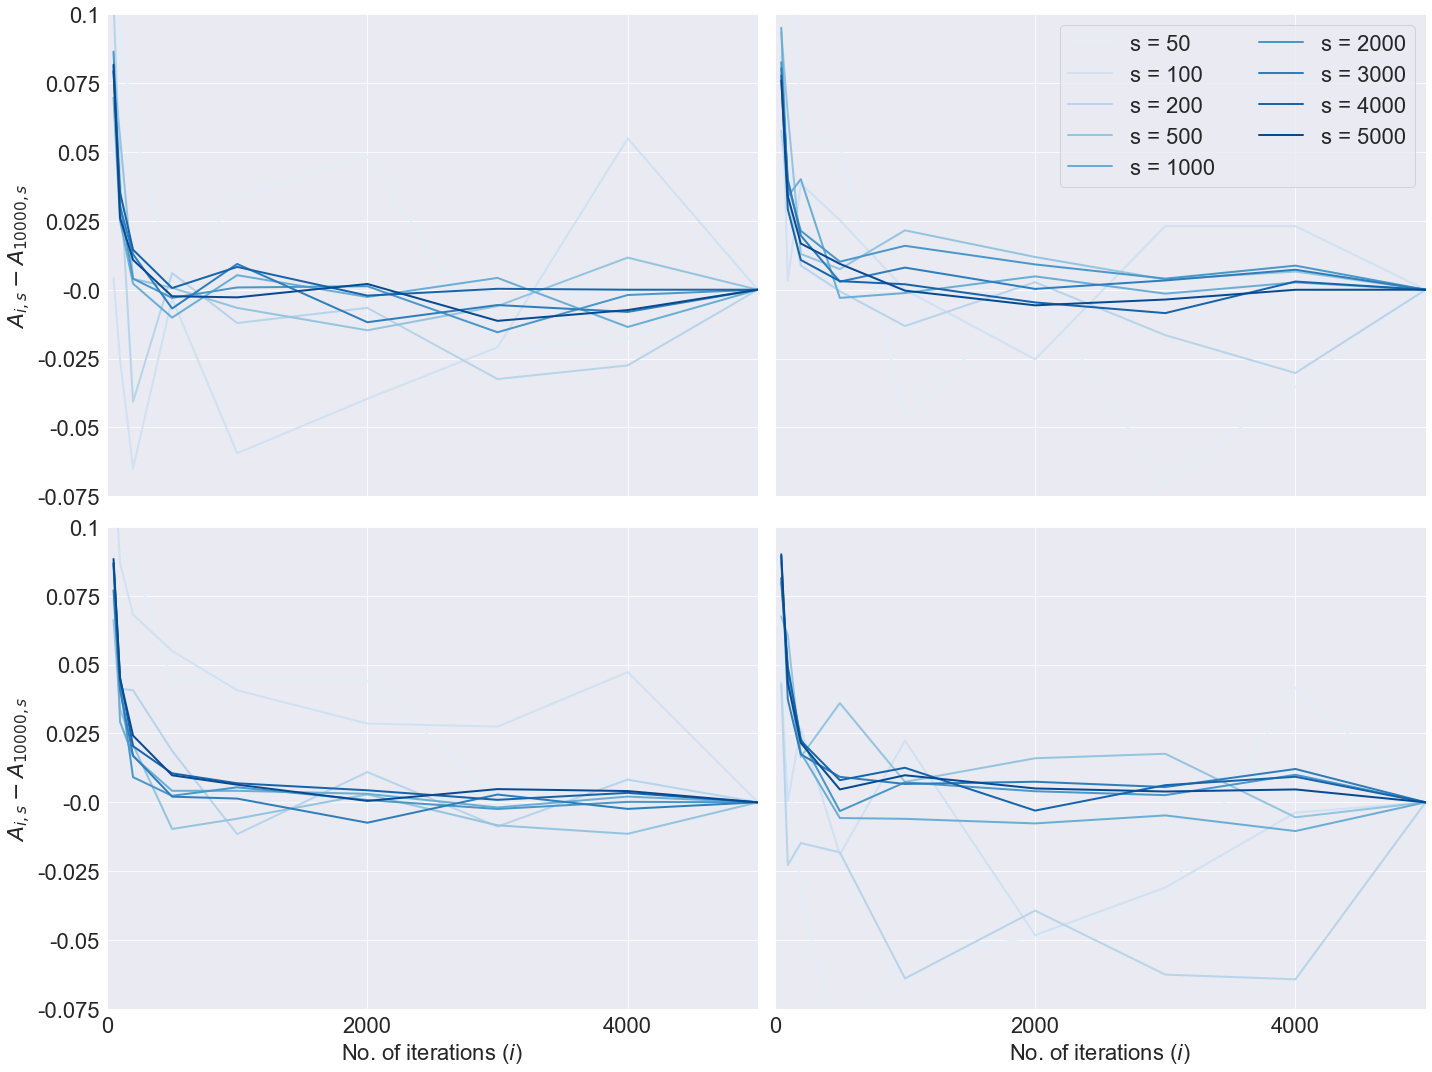

In [47]:
sns.set_style("darkgrid")
palette = sns.color_palette('Blues',len(s_list))
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     

for i in range(2):
    axs[1,i].set_xlabel(r'No. of iterations ($i$)', fontsize=22)
    axs[i,0].set_ylabel(r'$A_{i,s} - A_{10000,s}$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.025))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.025),3), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,2000))
        axs[i,j].set_xticklabels(np.arange(0,5500,2000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((-0.075,0.1))

sampling_list = [A_pure,A_lhs,A_ortho,A_imp]

for index in range(len(sampling_list)):
    for s in range(len(s_list)):
        mean = []
        std = []
        for i in range(len(n_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(n_list, delta_mean,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
        else:
            axs[1,index-2].plot(n_list, delta_mean,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))

    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('delta_area_i_as_x.pdf',dpi=100)


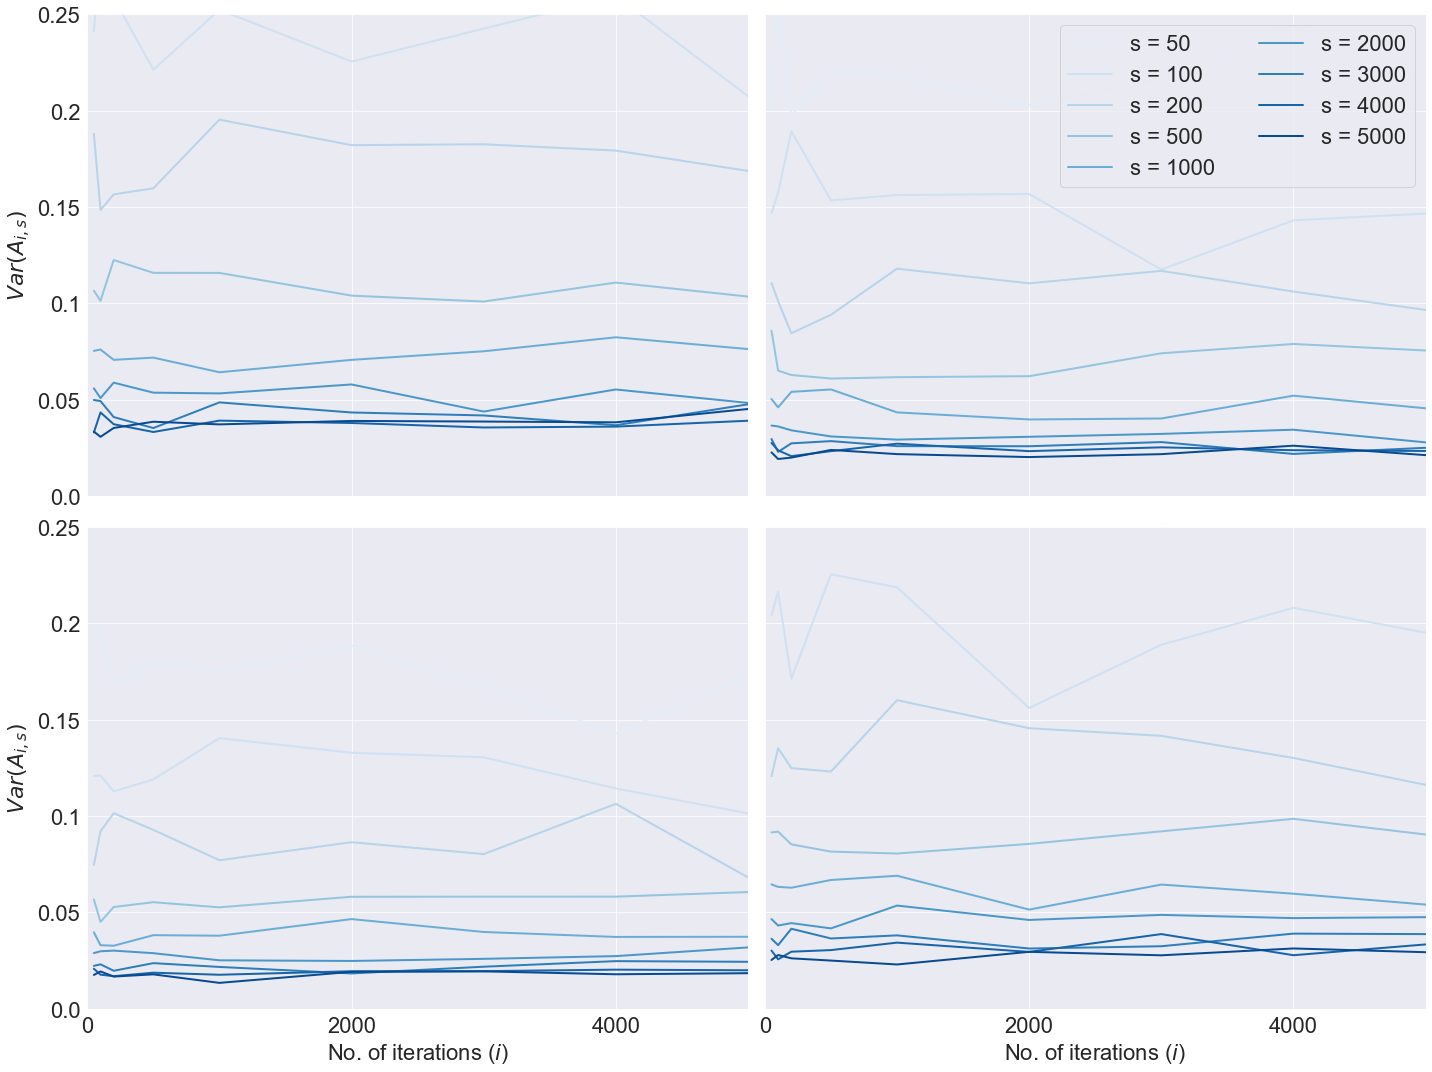

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     
palette = sns.color_palette('Blues',len(s_list))


for i in range(2):
    axs[1,i].set_xlabel(r'No. of iterations ($i$)', fontsize=22)
    axs[i,0].set_ylabel(r'$Var\left(A_{i,s}\right)$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.05))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.05),2), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,2000))
        axs[i,j].set_xticklabels(np.arange(0,5500,2000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((0,0.25))
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]

for index in range(len(sampling_list)):
    for s in range(len(s_list)):
        mean = []
        std = []
        for i in range(len(n_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(n_list, std,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))
        else:
            axs[1,index-2].plot(n_list, std,c=palette[s], linewidth=2, label = "s = {}".format(s_list[s]))

    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('varianceplots_i_as_x.pdf',dpi=100)


### Plot errors for varying s and show decreasing variance with increasing s

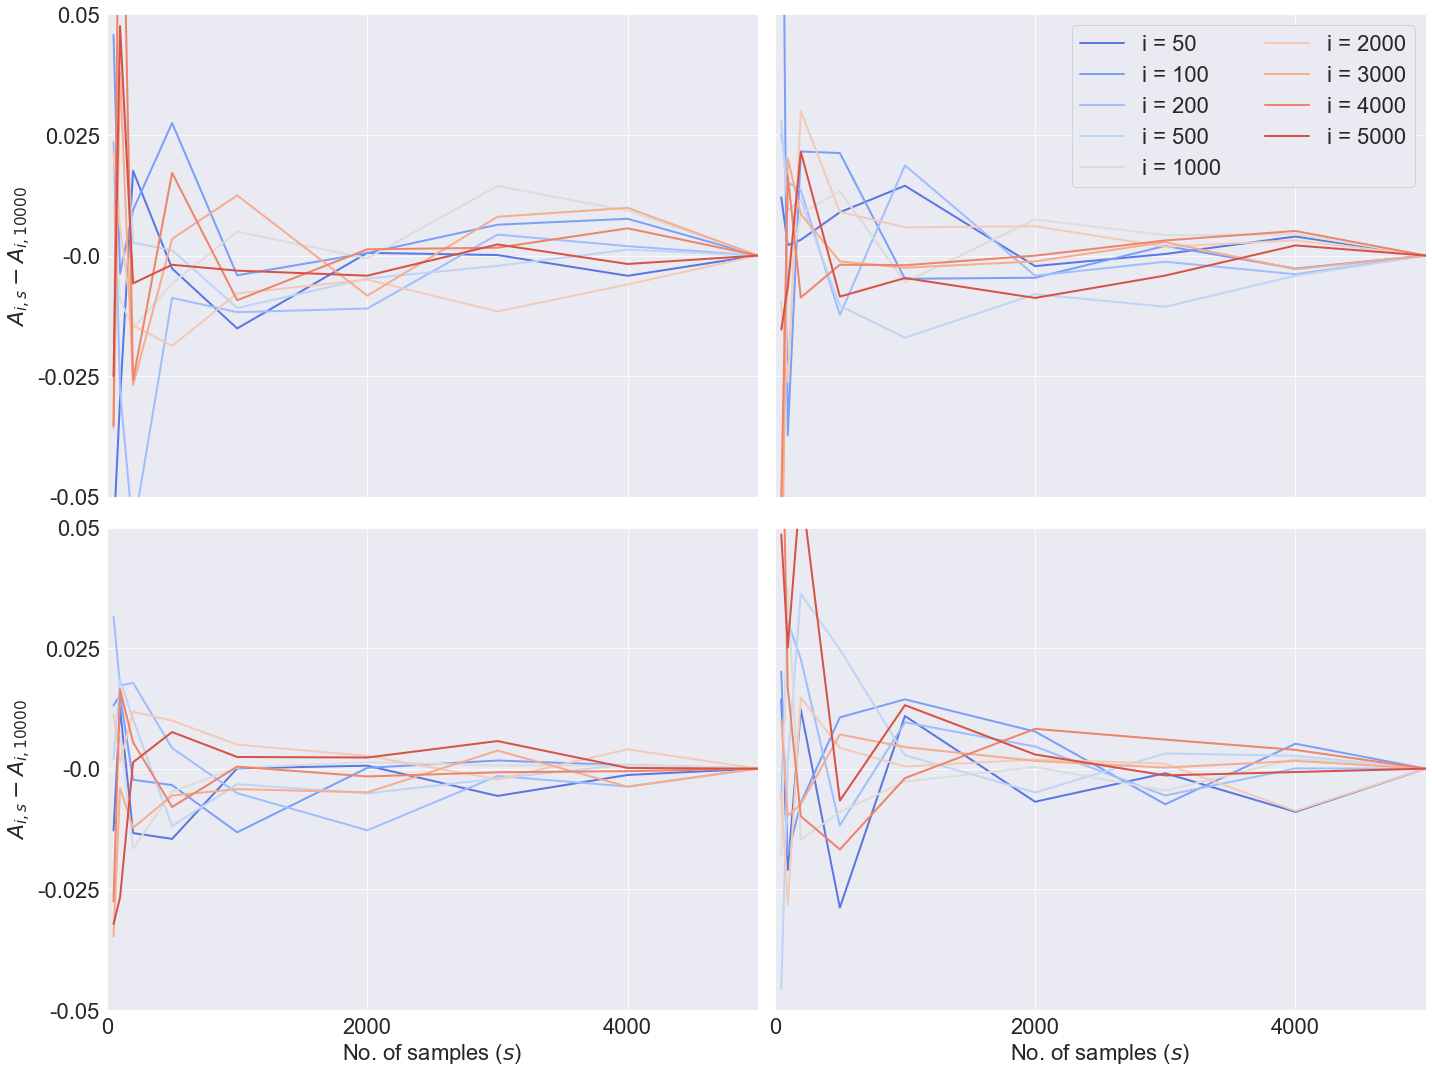

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()     
palette = sns.color_palette('Blues',len(s_list))


for i in range(2):
    axs[1,i].set_xlabel(r'No. of samples ($s$)', fontsize=22)
    axs[i,0].set_ylabel(r'$A_{i,s} - A_{i,10000}$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.025))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.025),3), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,2000))
        axs[i,j].set_xticklabels(np.arange(0,5500,2000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((-0.05,0.05))
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]

for index in range(len(sampling_list)):
    for i in range(len(n_list)):
        mean = []
        std = []
        for s in range(len(s_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(s_list, delta_mean,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
        else:
            axs[1,index-2].plot(s_list, delta_mean,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('delta_area_s_as_x.pdf',dpi=100)


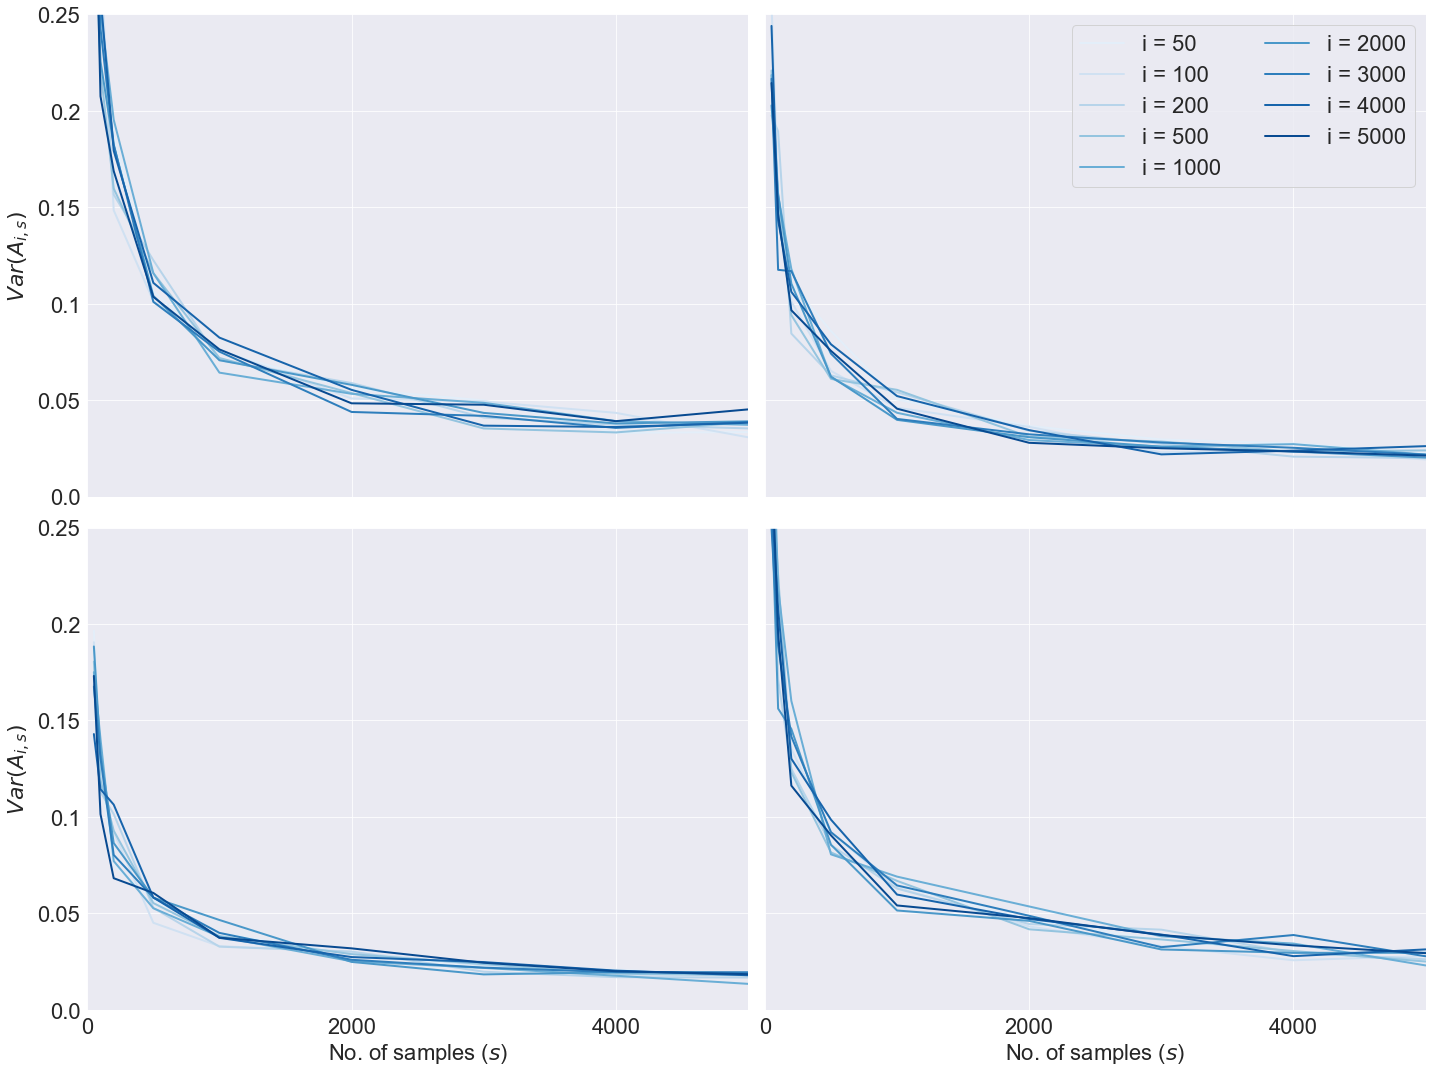

In [53]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True,sharey=True)
fig.tight_layout()
palette = sns.color_palette('Blues',len(s_list))


for i in range(2):
    axs[1,i].set_xlabel(r'No. of samples ($s$)', fontsize=22)
    axs[i,0].set_ylabel(r'$Var\left(A_{i,s}\right)$', fontsize=22)
    for j in range(2):
        axs[i,j].set_yticks(np.arange(-0.1,0.3,0.05))
        axs[i,j].set_yticklabels(np.round(np.arange(-0.1,0.3,0.05),2), fontsize=22)
        axs[i,j].set_xticks(np.arange(0,5500,2000))
        axs[i,j].set_xticklabels(np.arange(0,5500,2000), fontsize=22)
        axs[i,j].set_xlim((0,5000))
        axs[i,j].set_ylim((0,0.25))
sampling_list = [A_pure,A_lhs,A_ortho,A_imp]

for index in range(len(sampling_list)):
    for i in range(len(n_list)):
        mean = []
        std = []
        for s in range(len(s_list)):
            mean.append(np.mean(sampling_list[index][i, s]))
            std.append(np.std(sampling_list[index][i, s]))
        delta_mean = mean - mean[len(mean)-1]
        errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
        errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
        if index < 2:
            axs[0,index].plot(s_list, std,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))
        else:
            axs[1,index-2].plot(s_list, std,c=palette[i], linewidth=2, label = "i = {}".format(n_list[i]))

    
axs[0,1].legend(fontsize=22,loc='upper right',ncol=2)
fig.tight_layout()
fig.savefig('varianceplots_s_as_x.pdf',dpi=100)


#### Results do not seem to improve with i increasing after 1000, so look at i=1000 and the variance for various s

In [58]:
n_list2 = [1000]
s_list2 = [50, 100, 200, 500, 1000, 2000, 3000, 4000, 5000, 10000, 12500, 15000, 17500, 20000]

In [ ]:
np.random.seed(seedy)
start = time.time()
A_pure3 = est_area(n_list2,s_list2,reps=100,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='pure')
print(str(time.time()-start))
A_lhs3 = est_area(n_list2,s_list2,reps=100,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='lhs')
print(str(time.time()-start))
A_ortho3 = est_area(n_list2,s_list2,reps=100,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='ortho')
print(str(time.time()-start))
A_imp3 = est_area(n_list2,s_list2,reps=100,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='importance')
print(str(time.time()-start))

812.3216776847839
1621.7375378608704
2442.2945127487183


In [53]:
np.random.seed(seedy)
start = time.time()
A_pure2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='pure')
print(str(time.time()-start))
A_lhs2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='lhs')
print(str(time.time()-start))
A_ortho2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='ortho')
print(str(time.time()-start))
A_imp2 = est_area(n_list2,s_list2,reps=50,range_real=(-2,.5),range_im=(-1.1,1.1),sampling='importance')
print(str(time.time()-start))

426.8583388328552
866.4322319030762
1303.235694885254
2268.9043447971344


In [54]:
np.savetxt("pure2.csv", A_pure2.reshape(A_pure2.shape[1], -1), delimiter=",")
np.savetxt("lhs2.csv", A_lhs2.reshape(A_lhs2.shape[1], -1), delimiter=",")
np.savetxt("ortho2.csv", A_ortho2.reshape(A_ortho2.shape[1], -1), delimiter=",")
np.savetxt("imp2.csv", A_imp2.reshape(A_imp2.shape[1], -1), delimiter=",")

In [56]:
A_pure2 = np.genfromtxt('pure2.csv', delimiter=',')
A_lhs2 = np.genfromtxt('lhs2.csv', delimiter=',')
A_ortho2 = np.genfromtxt('ortho2.csv', delimiter=',')
A_imp2 = np.genfromtxt('imp2.csv', delimiter=',')

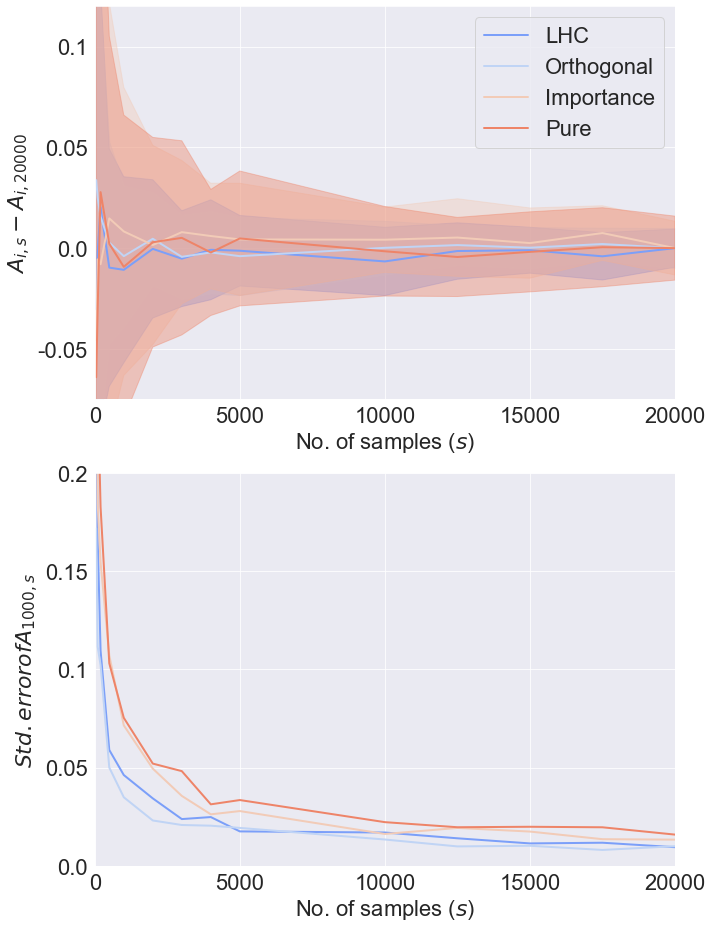

In [99]:
fig, axs = plt.subplots(2,1, figsize=(10,13))
fig.tight_layout()   

sampling_list = [A_lhs2,A_ortho2,A_imp2,A_pure2]
sampling_string = ['LHC','Orthogonal','Importance','Pure']
palette = sns.color_palette('coolwarm',len(sampling_list))

for i in range(2):
    axs[i].set_xlabel(r'No. of samples ($s$)', fontsize=22)
    axs[i].set_xticks(np.arange(0,20500,5000))
    axs[i].set_xticklabels(np.arange(0,20500,5000), fontsize=22)
    axs[i].set_xlim((0,20000))
axs[0].set_ylabel(r'$A_{i,s} - A_{i,20000}$', fontsize=22)
axs[0].set_yticks(np.arange(-0.1,0.3,0.05))
axs[0].set_yticklabels(np.round(np.arange(-0.1,0.25,0.05),2), fontsize=22)
axs[0].set_ylim((-0.075,0.12))
axs[1].set_ylabel(r'$Std. error of A_{1000,s}$', fontsize=22)
axs[1].set_yticks(np.arange(-0.1,0.3,0.05))
axs[1].set_yticklabels(np.round(np.arange(-0.1,0.25,0.05),2), fontsize=22)
axs[1].set_ylim((0,0.2))


for index in range(len(sampling_list)):

    mean = []
    std = []
    for s in range(len(s_list2)):
        mean.append(np.mean(sampling_list[index][s]))
        std.append(np.std(sampling_list[index][s]))
    delta_mean = mean - mean[len(mean)-1]
    errors_pos = [sum(a) for a in zip(*[delta_mean,std])]
    errors_neg = [sum(a) for a in zip(*[delta_mean,[-x for x in std]])]
    axs[0].plot(s_list2, delta_mean,color=palette[index], linewidth=2, label = "{}".format(sampling_string[index]))
    axs[0].fill_between(s_list2, errors_pos, errors_neg,color=palette[index], alpha=0.4)
    axs[1].plot(s_list2, std,c=palette[index], linewidth=2, label = "{}".format(sampling_string[index]))

axs[0].legend(fontsize=22,loc='upper right',ncol=1)
fig.tight_layout()
fig.savefig('i1000_inclconfidence.pdf',dpi=100)
